# Разведывательный анализ данных 

## Суть проекта 
отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

## Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

## Этапы

1. Проведиение первичной обработку данных. 
2. Преобразование данных и странение выбросов.
3. Корреляционный анализ 
4. Анализ номинативных переменных 
5. Формирование итогового датасета

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

studmath_core = pd.read_csv('C:/Users/gadopyatikna/KillFactory/stud_math.xls')
display(studmath_core.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [8]:
studmath_core.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [12]:
studmath_core_renamed = studmath_core.rename(columns = {'studytime, granular': 'studytime_granular'}, inplace = False)
print(studmath_core_renamed)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

     reason guardian  traveltime  studytime  failur

2


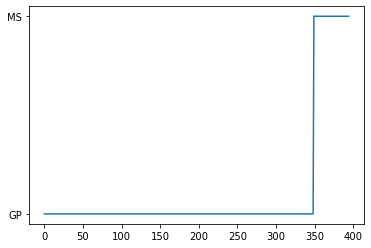

In [13]:
print(studmath_core_renamed.school.nunique())
plt.plot(studmath_core_renamed.school)

In [14]:
pd.DataFrame(studmath_core_renamed.school.value_counts())

,school
GP,349
MS,46


In [15]:
studmath_core_renamed.drop(['school'], inplace = True, axis = 1)


In [16]:
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 395 non-null    object 
 1   age                 395 non-null    int64  
 2   address             378 non-null    object 
 3   famsize             368 non-null    object 
 4   Pstatus             350 non-null    object 
 5   Medu                392 non-null    float64
 6   Fedu                371 non-null    float64
 7   Mjob                376 non-null    object 
 8   Fjob                359 non-null    object 
 9   reason              378 non-null    object 
 10  guardian            364 non-null    object 
 11  traveltime          367 non-null    float64
 12  studytime           388 non-null    float64
 13  failures            373 non-null    float64
 14  schoolsup           386 non-null    object 
 15  famsup              356 non-null    object 
 16  paid    

Задача исследования - повышение уровня благополучия детей по всему миру, в этом смысле какая-то конкретная школа не может явлтся модельным признаком поскольку создать условия, чтобы все дети учились в одной школе невозможно.Теоретически методика обучения в конкретной школе могла бы существенно влиять на результаты, однако нам неизвестно в чем заключается отличие школ.

2


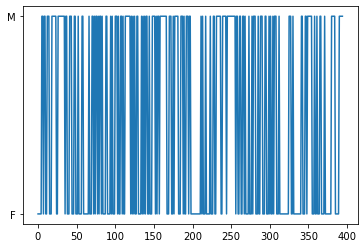

In [17]:
print(studmath_core_renamed.sex.nunique()) 
pd.DataFrame(studmath_core_renamed.sex.value_counts()) 
plt.plot(studmath_core_renamed.sex)

In [18]:
studmath_core_renamed.drop(['sex'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 395 non-null    int64  
 1   address             378 non-null    object 
 2   famsize             368 non-null    object 
 3   Pstatus             350 non-null    object 
 4   Medu                392 non-null    float64
 5   Fedu                371 non-null    float64
 6   Mjob                376 non-null    object 
 7   Fjob                359 non-null    object 
 8   reason              378 non-null    object 
 9   guardian            364 non-null    object 
 10  traveltime          367 non-null    float64
 11  studytime           388 non-null    float64
 12  failures            373 non-null    float64
 13  schoolsup           386 non-null    object 
 14  famsup              356 non-null    object 
 15  paid                355 non-null    object 
 16  activiti

пол не является условием жизни

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

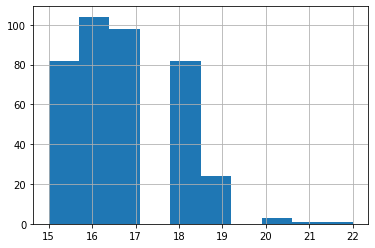

In [19]:
studmath_core_renamed.age.hist()
studmath_core_renamed.age.describe()

все данные укладваюстся в необходимый диапазон определенный при постановке задачи. поскольку возраст не является условием жизни и повлиять на него неаозможно стоит исключить его из исследования

In [20]:
studmath_core_renamed.drop(['age'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             378 non-null    object 
 1   famsize             368 non-null    object 
 2   Pstatus             350 non-null    object 
 3   Medu                392 non-null    float64
 4   Fedu                371 non-null    float64
 5   Mjob                376 non-null    object 
 6   Fjob                359 non-null    object 
 7   reason              378 non-null    object 
 8   guardian            364 non-null    object 
 9   traveltime          367 non-null    float64
 10  studytime           388 non-null    float64
 11  failures            373 non-null    float64
 12  schoolsup           386 non-null    object 
 13  famsup              356 non-null    object 
 14  paid                355 non-null    object 
 15  activities          381 non-null    object 
 16  nursery 

In [21]:
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             378 non-null    object 
 1   famsize             368 non-null    object 
 2   Pstatus             350 non-null    object 
 3   Medu                392 non-null    float64
 4   Fedu                371 non-null    float64
 5   Mjob                376 non-null    object 
 6   Fjob                359 non-null    object 
 7   reason              378 non-null    object 
 8   guardian            364 non-null    object 
 9   traveltime          367 non-null    float64
 10  studytime           388 non-null    float64
 11  failures            373 non-null    float64
 12  schoolsup           386 non-null    object 
 13  famsup              356 non-null    object 
 14  paid                355 non-null    object 
 15  activities          381 non-null    object 
 16  nursery 

,address
U,295
R,83


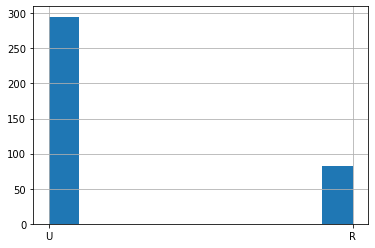

In [22]:
studmath_core_renamed.address.hist()
studmath_core_renamed.address.describe()
studmath_core_renamed.address.unique()
display(pd.DataFrame(studmath_core_renamed.address.value_counts()))

,famsize
GT3,261
LE3,107


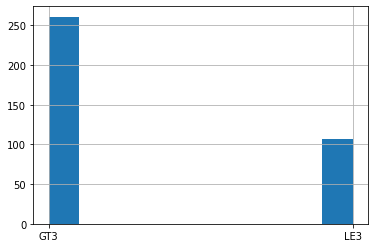

In [23]:
studmath_core_renamed.famsize.hist()
studmath_core_renamed.famsize.describe()
studmath_core_renamed.famsize.unique()
display(pd.DataFrame(studmath_core_renamed.famsize.value_counts()))

,Pstatus
T,314
A,36


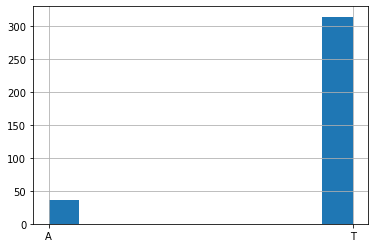

In [24]:
studmath_core_renamed.Pstatus.hist() 
studmath_core_renamed.Pstatus.describe()
studmath_core_renamed.Pstatus.unique()
display(pd.DataFrame(studmath_core_renamed.Pstatus.value_counts()))

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


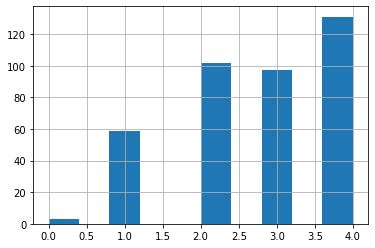

In [25]:
studmath_core_renamed.Medu.hist()
studmath_core_renamed.Medu.describe()
studmath_core_renamed.Medu.unique()
display(pd.DataFrame(studmath_core_renamed.Medu.value_counts()))

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


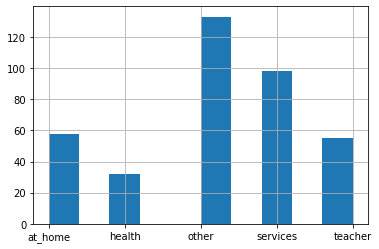

In [26]:
studmath_core_renamed.Mjob.hist()
studmath_core_renamed.Mjob.describe()
studmath_core_renamed.Mjob.unique()
display(pd.DataFrame(studmath_core_renamed.Mjob.value_counts()))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


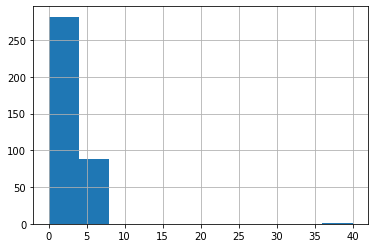

In [27]:
studmath_core_renamed.Fedu.hist()
studmath_core_renamed.Fedu.describe()
studmath_core_renamed.Fedu.unique()
display(pd.DataFrame(studmath_core_renamed.Fedu.value_counts()))

<AxesSubplot:>

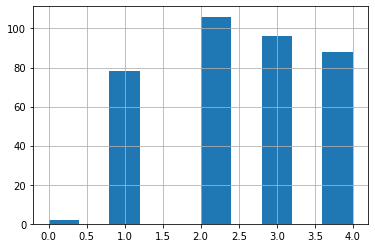

In [28]:
studmath_core_renamed = studmath_core_renamed.loc[studmath_core_renamed.Fedu <= 4]
studmath_core_renamed.Fedu.hist()

значение 40 не предусмотрено опросом, можно предположить, что это ошибка выбора варианта 4, но поскольку мы достоверно не можем утверждать и такое значение только одно проще его исключить из набора данных

In [29]:
display(pd.DataFrame(studmath_core_renamed.Fedu.value_counts()))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


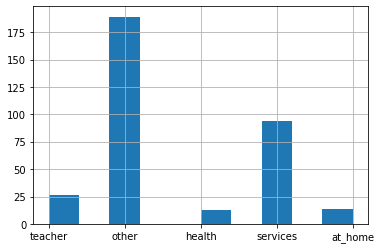

In [30]:
studmath_core_renamed.Fjob.hist()
studmath_core_renamed.Fjob.describe()
studmath_core_renamed.Fjob.unique()
display(pd.DataFrame(studmath_core_renamed.Fjob.value_counts()))

In [31]:
studmath_core_renamed.drop(['reason'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             354 non-null    object 
 1   famsize             345 non-null    object 
 2   Pstatus             327 non-null    object 
 3   Medu                367 non-null    float64
 4   Fedu                370 non-null    float64
 5   Mjob                351 non-null    object 
 6   Fjob                336 non-null    object 
 7   guardian            340 non-null    object 
 8   traveltime          345 non-null    float64
 9   studytime           363 non-null    float64
 10  failures            351 non-null    float64
 11  schoolsup           361 non-null    object 
 12  famsup              335 non-null    object 
 13  paid                333 non-null    object 
 14  activities          356 non-null    object 
 15  nursery             354 non-null    object 
 16  studytim

причина выбора школы не является условием жизни учащихся

,guardian
mother,236
father,78
other,26


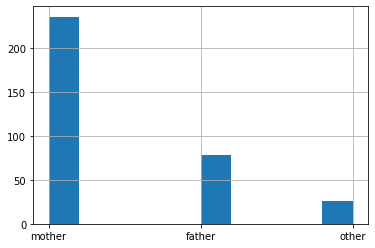

In [33]:
studmath_core_renamed.guardian.hist()
studmath_core_renamed.guardian.describe()
studmath_core_renamed.guardian.unique()
display(pd.DataFrame(studmath_core_renamed.guardian.value_counts()))

In [34]:
studmath_core_renamed.guardian.describe()

count        340
unique         3
top       mother
freq         236
Name: guardian, dtype: object

,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


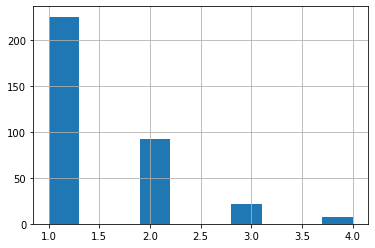

In [35]:
studmath_core_renamed.traveltime.hist()
studmath_core_renamed.traveltime.describe()
studmath_core_renamed.traveltime.unique()
display(pd.DataFrame(studmath_core_renamed.traveltime.value_counts()))

,studytime
2.0,182
1.0,98
3.0,58
4.0,25


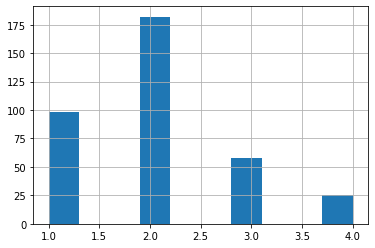

In [36]:
studmath_core_renamed.studytime.hist()
studmath_core_renamed.studytime.describe()
studmath_core_renamed.studytime.unique()
display(pd.DataFrame(studmath_core_renamed.studytime.value_counts()))

,studytime_granular
-6.0,182
-3.0,98
-9.0,58
-12.0,25


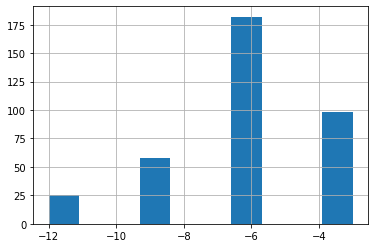

In [37]:
studmath_core_renamed.studytime_granular.hist()
studmath_core_renamed.studytime_granular.describe()
studmath_core_renamed.studytime_granular.unique()
display(pd.DataFrame(studmath_core_renamed.studytime_granular.value_counts()))

,failures
0.0,277
1.0,45
3.0,15
2.0,14


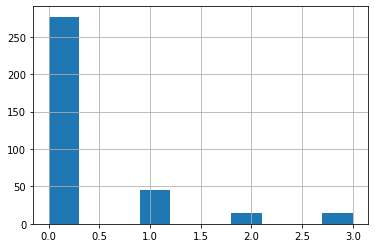

In [38]:
studmath_core_renamed.failures.hist()
studmath_core_renamed.failures.describe()
studmath_core_renamed.failures.unique()
display(pd.DataFrame(studmath_core_renamed.failures.value_counts()))

не является условием жизни, скорее можно рассматривать как исход а не как переменную, логично исключить из набора

In [39]:
studmath_core_renamed.drop(['failures'], inplace = True, axis = 1)

In [40]:
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             354 non-null    object 
 1   famsize             345 non-null    object 
 2   Pstatus             327 non-null    object 
 3   Medu                367 non-null    float64
 4   Fedu                370 non-null    float64
 5   Mjob                351 non-null    object 
 6   Fjob                336 non-null    object 
 7   guardian            340 non-null    object 
 8   traveltime          345 non-null    float64
 9   studytime           363 non-null    float64
 10  schoolsup           361 non-null    object 
 11  famsup              335 non-null    object 
 12  paid                333 non-null    object 
 13  activities          356 non-null    object 
 14  nursery             354 non-null    object 
 15  studytime_granular  363 non-null    float64
 16  higher  

,schoolsup
no,314
yes,47


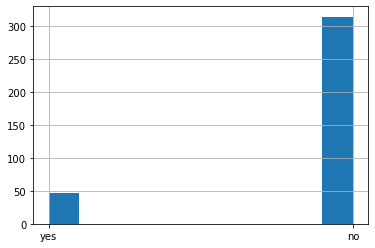

In [41]:
studmath_core_renamed.schoolsup.hist()
studmath_core_renamed.schoolsup.describe()
studmath_core_renamed.schoolsup.unique()
display(pd.DataFrame(studmath_core_renamed.schoolsup.value_counts()))

In [42]:
studmath_core_renamed.schoolsup.describe()

count     361
unique      2
top        no
freq      314
Name: schoolsup, dtype: object

,famsup
yes,204
no,131


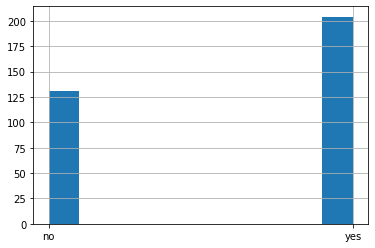

In [43]:
studmath_core_renamed.famsup.hist()
studmath_core_renamed.famsup.describe()
studmath_core_renamed.famsup.unique()
display(pd.DataFrame(studmath_core_renamed.famsup.value_counts()))

In [44]:
studmath_core_renamed.famsup.describe()

count     335
unique      2
top       yes
freq      204
Name: famsup, dtype: object

,paid
no,188
yes,145


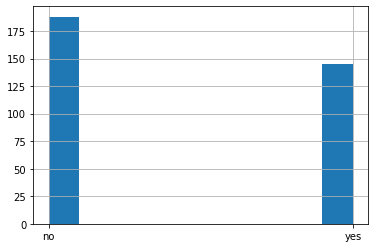

In [45]:
studmath_core_renamed.paid.hist()
studmath_core_renamed.paid.describe()
studmath_core_renamed.paid.unique()
display(pd.DataFrame(studmath_core_renamed.paid.value_counts()))

,activities
yes,180
no,176


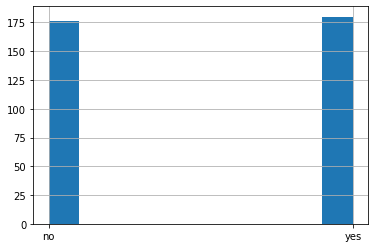

In [46]:
studmath_core_renamed.activities.hist()
studmath_core_renamed.activities.describe()
studmath_core_renamed.activities.unique()
display(pd.DataFrame(studmath_core_renamed.activities.value_counts()))

array(['yes', 'no', nan], dtype=object)

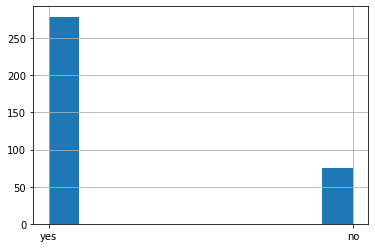

In [47]:
studmath_core_renamed.nursery.hist()
studmath_core_renamed.nursery.describe()
studmath_core_renamed.nursery.unique()


In [48]:
studmath_core_renamed.drop(['higher'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             354 non-null    object 
 1   famsize             345 non-null    object 
 2   Pstatus             327 non-null    object 
 3   Medu                367 non-null    float64
 4   Fedu                370 non-null    float64
 5   Mjob                351 non-null    object 
 6   Fjob                336 non-null    object 
 7   guardian            340 non-null    object 
 8   traveltime          345 non-null    float64
 9   studytime           363 non-null    float64
 10  schoolsup           361 non-null    object 
 11  famsup              335 non-null    object 
 12  paid                333 non-null    object 
 13  activities          356 non-null    object 
 14  nursery             354 non-null    object 
 15  studytime_granular  363 non-null    float64
 16  internet

желаение не является условием жизни, переменная не отвечает целям исследования, стоит исключить

array([nan, 'yes', 'no'], dtype=object)

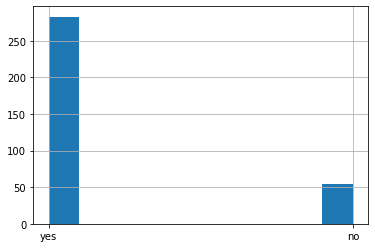

In [49]:
studmath_core_renamed.internet.hist()
studmath_core_renamed.internet.describe()
studmath_core_renamed.internet.unique()

In [50]:
studmath_core_renamed.drop(['romantic'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             354 non-null    object 
 1   famsize             345 non-null    object 
 2   Pstatus             327 non-null    object 
 3   Medu                367 non-null    float64
 4   Fedu                370 non-null    float64
 5   Mjob                351 non-null    object 
 6   Fjob                336 non-null    object 
 7   guardian            340 non-null    object 
 8   traveltime          345 non-null    float64
 9   studytime           363 non-null    float64
 10  schoolsup           361 non-null    object 
 11  famsup              335 non-null    object 
 12  paid                333 non-null    object 
 13  activities          356 non-null    object 
 14  nursery             354 non-null    object 
 15  studytime_granular  363 non-null    float64
 16  internet

наличие ил отсутвие романтических отношений не является критерием условием жизни 

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

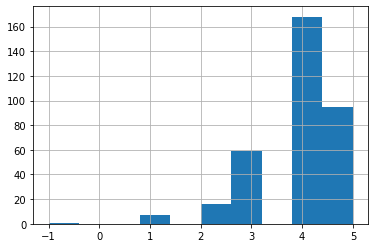

In [52]:
studmath_core_renamed.famrel.hist()
studmath_core_renamed.famrel.describe()
studmath_core_renamed.famrel.unique()

In [53]:
display(pd.DataFrame(studmath_core_renamed.famrel.value_counts()))

,famrel
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7
-1.0,1


<AxesSubplot:>

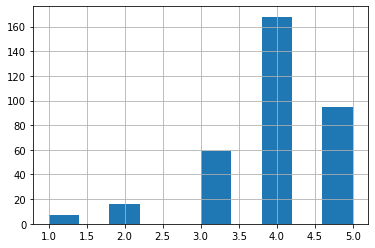

In [54]:
studmath_core_renamed = studmath_core_renamed.loc[studmath_core_renamed.famrel > 0]
studmath_core_renamed.famrel.hist()

-1 не является вариантом ответа по условию отбора

array([ 3.,  2.,  4.,  1.,  5., nan])

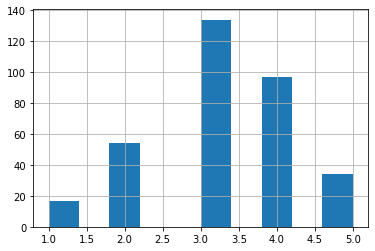

In [55]:
studmath_core_renamed.freetime.hist()
studmath_core_renamed.freetime.describe()
studmath_core_renamed.freetime.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

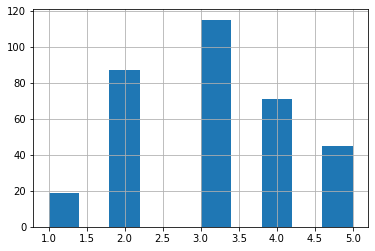

In [56]:
studmath_core_renamed.goout.hist()
studmath_core_renamed.goout.describe()
studmath_core_renamed.goout.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

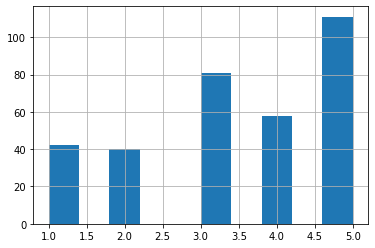

In [57]:
studmath_core_renamed.health.hist()
studmath_core_renamed.health.describe()
studmath_core_renamed.health.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,   7.,   8.,  25.,  14.,
        12.,  54.,  18.,  26.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
         3., 385.,  20.,  21.,   1.,   9.,  38.,  40.,  23.,  11.,  17.,
       212.])

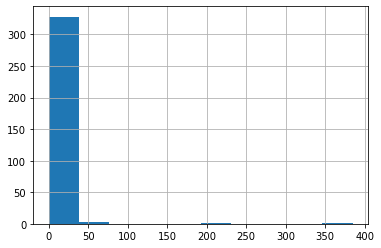

In [58]:
studmath_core_renamed.absences.hist()
studmath_core_renamed.absences.describe()
studmath_core_renamed.absences.unique()

In [59]:
display(pd.DataFrame(studmath_core_renamed.absences.value_counts()))

,absences
0.0,95
2.0,54
4.0,47
6.0,27
8.0,21
10.0,14
12.0,11
14.0,9
3.0,8
16.0,7


<AxesSubplot:>

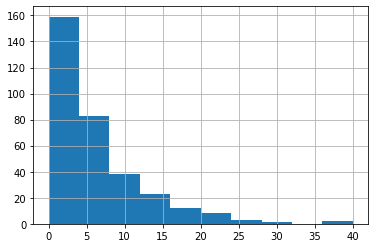

In [60]:
studmath_core_renamed = studmath_core_renamed.loc[studmath_core_renamed.absences <= 50]
studmath_core_renamed.absences.hist()

здравый смысл подсказывает что количество пропусков более 50 выглядит неестественным и сильно влияет на параметры распределения

array([ 30.,  50.,  75.,  55.,  45.,  80.,  70.,  25.,  60.,  85.,  90.,
        65., 100.,  35.,  40.,  95.,   0.,  nan,  20.])

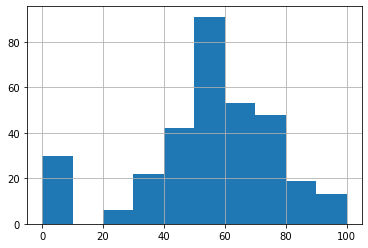

In [61]:
studmath_core_renamed.score.hist()
studmath_core_renamed.score.describe()
studmath_core_renamed.score.unique()

In [62]:
studmath_core_renamed.score.describe()

count    324.000000
mean      52.175926
std       22.460214
min        0.000000
25%       43.750000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

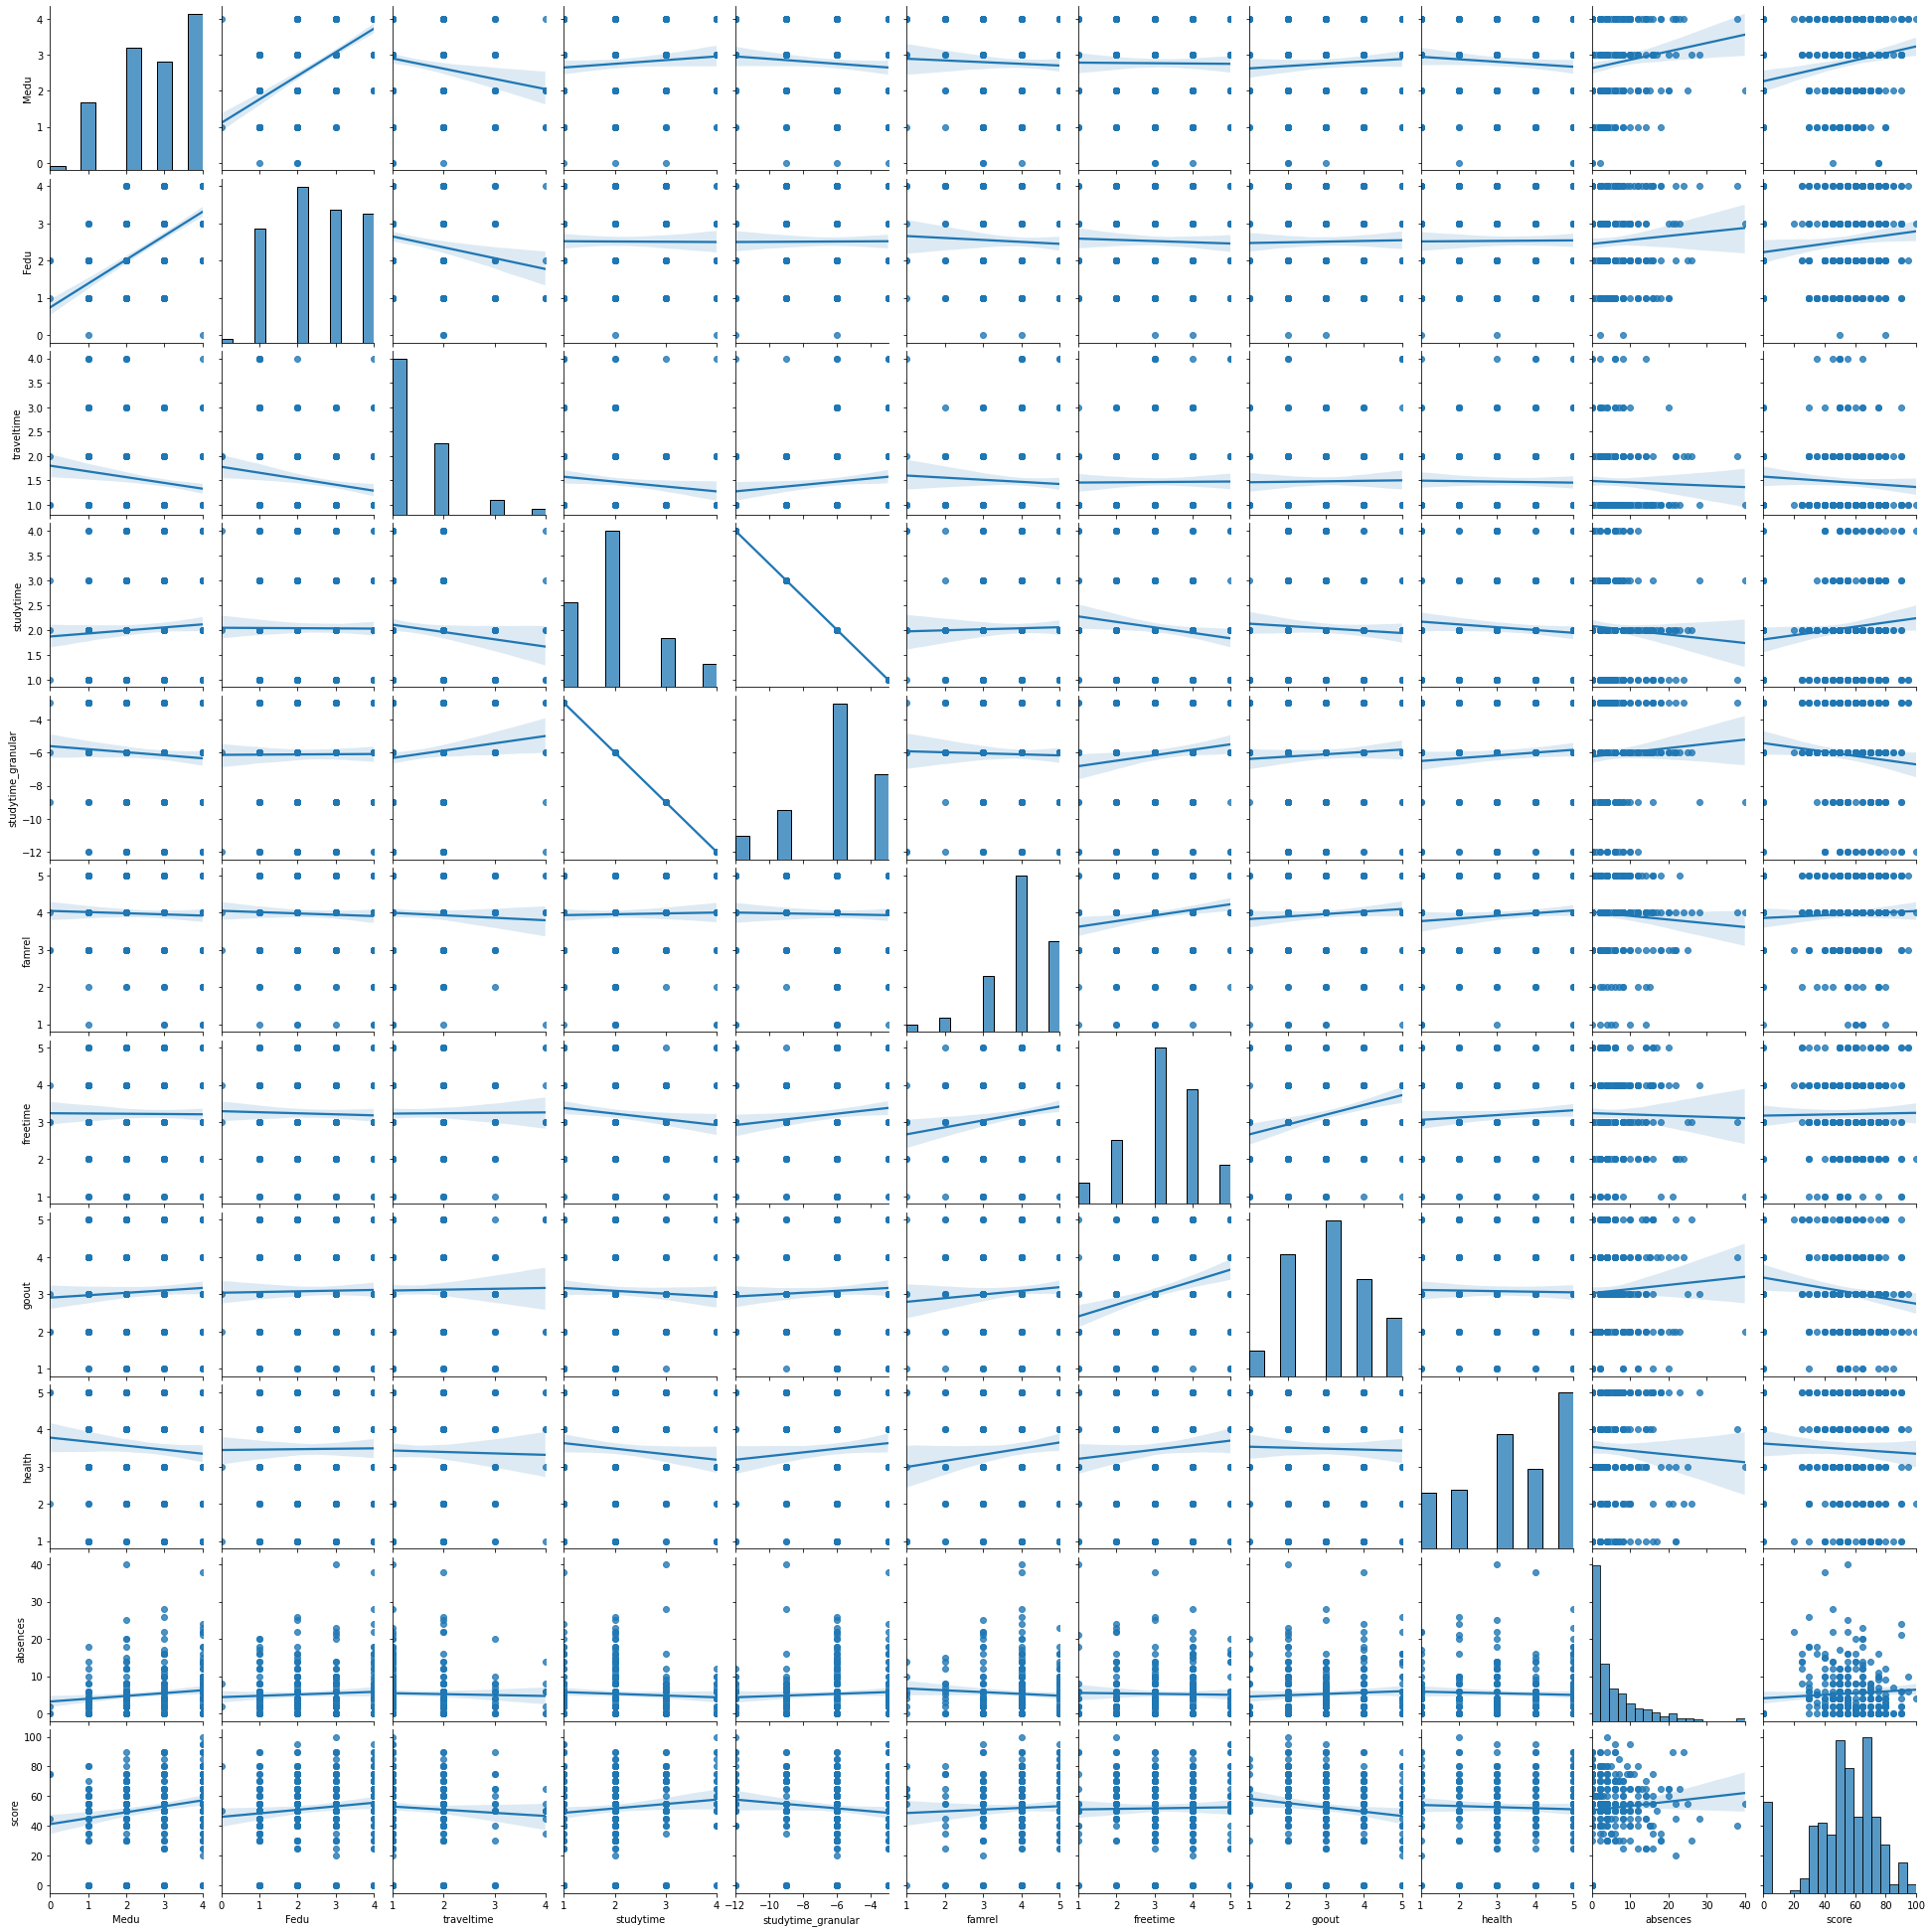

In [63]:
sns.pairplot(studmath_core_renamed, kind = 'reg')

In [64]:
studmath_core_renamed.corr()

,Medu,Fedu,traveltime,studytime,studytime_granular,famrel,freetime,goout,health,absences,score
Medu,1.000000,0.649222,-0.182925,0.079209,-0.079209,-0.038449,-0.007760,0.065208,-0.086507,0.132686,0.196835
Fedu,0.649222,1.000000,-0.188914,-0.005429,0.005429,-0.043031,-0.030394,0.018743,0.009003,0.061455,0.115471
traveltime,-0.182925,-0.188914,1.000000,-0.121020,0.121020,-0.053650,0.007549,0.015018,-0.019926,-0.027909,-0.067086
studytime,0.079209,-0.005429,-0.121020,1.000000,-1.000000,0.022123,-0.130023,-0.060072,-0.091456,-0.063095,0.112451
studytime_granular,-0.079209,0.005429,0.121020,-1.000000,1.000000,-0.022123,0.130023,0.060072,0.091456,0.063095,-0.112451
famrel,-0.038449,-0.043031,-0.053650,0.022123,-0.022123,1.000000,0.168196,0.081292,0.108720,-0.069495,0.046369
freetime,-0.007760,-0.030394,0.007549,-0.130023,0.130023,0.168196,1.000000,0.288267,0.088859,-0.020827,0.016346
goout,0.065208,0.018743,0.015018,-0.060072,0.060072,0.081292,0.288267,1.000000,-0.020579,0.063109,-0.142412
health,-0.086507,0.009003,-0.019926,-0.091456,0.091456,0.108720,0.088859,-0.020579,1.000000,-0.047276,-0.044726
absences,0.132686,0.061455,-0.027909,-0.063095,0.063095,-0.069495,-0.020827,0.063109,-0.047276,1.000000,0.081455


У переменных studytime и studitime_granulat можно скахать функциональная зависимость, при том что вторая не описана в задании и смысл ее нам неизвестен, ее можно удалить

In [65]:
studmath_core_renamed.drop(['studytime_granular'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     317 non-null    object 
 1   famsize     308 non-null    object 
 2   Pstatus     290 non-null    object 
 3   Medu        326 non-null    float64
 4   Fedu        329 non-null    float64
 5   Mjob        312 non-null    object 
 6   Fjob        301 non-null    object 
 7   guardian    301 non-null    object 
 8   traveltime  306 non-null    float64
 9   studytime   324 non-null    float64
 10  schoolsup   320 non-null    object 
 11  famsup      296 non-null    object 
 12  paid        295 non-null    object 
 13  activities  317 non-null    object 
 14  nursery     313 non-null    object 
 15  internet    299 non-null    object 
 16  famrel      329 non-null    float64
 17  freetime    321 non-null    float64
 18  goout       321 non-null    float64
 19  health      316 non-null    f

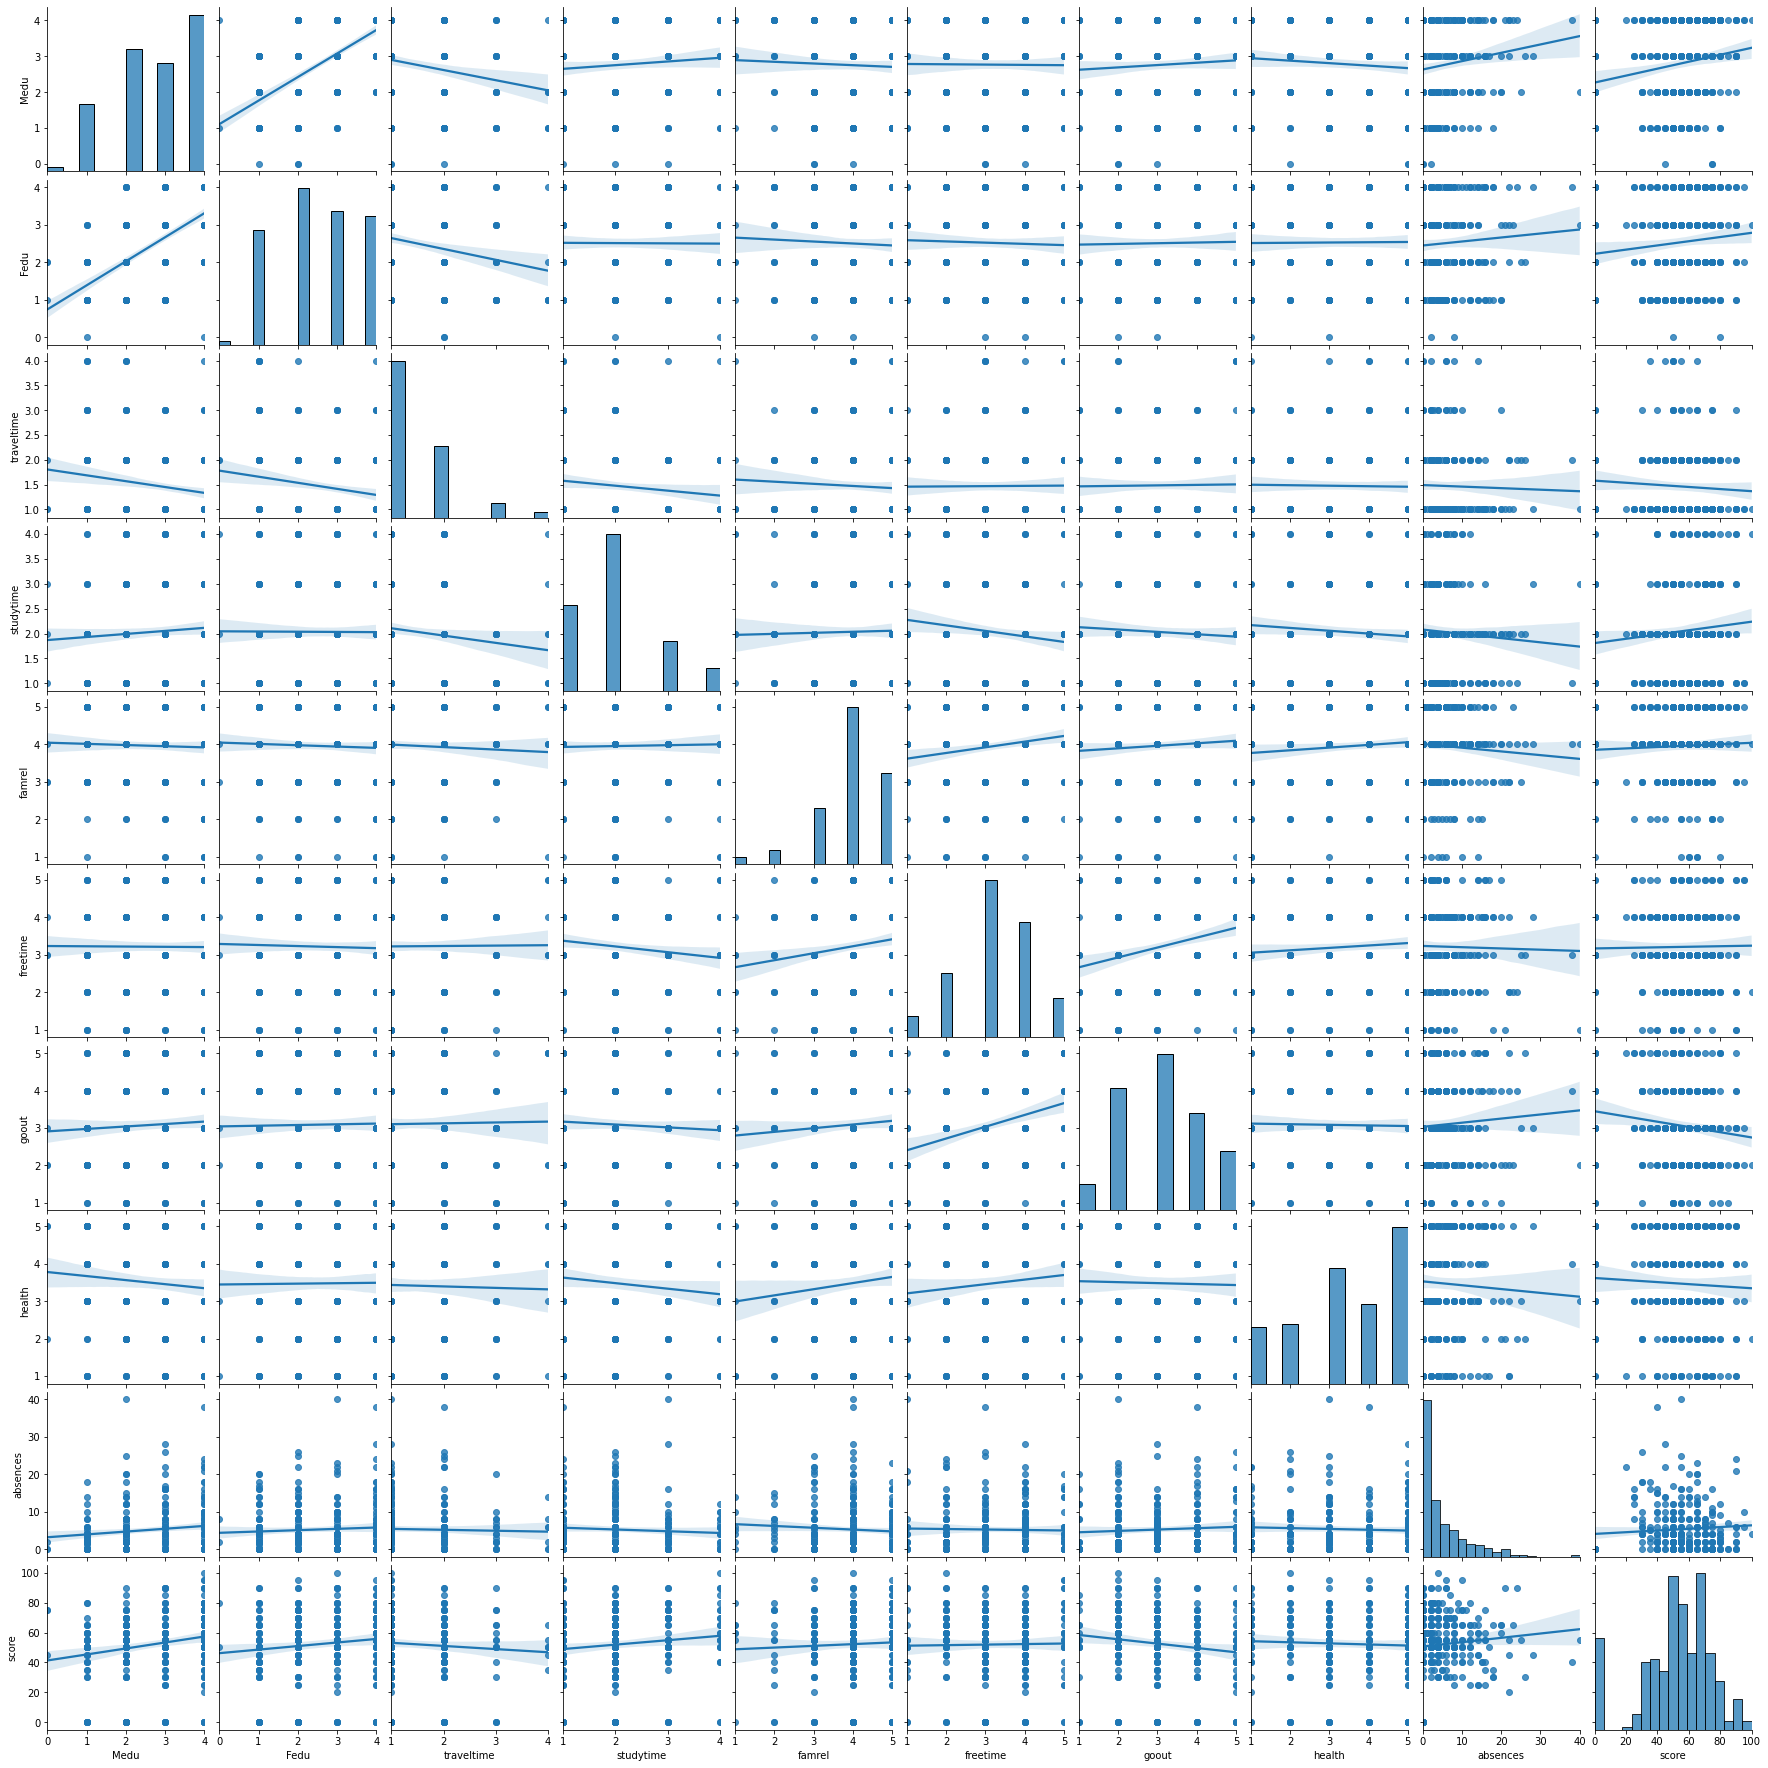

In [66]:
sns.pairplot(studmath_core_renamed, kind = 'reg')

достаточно сильная кореляции у переменных содержащих уровень образования родителей, в принципе это объяснимо. Но исключать не стоит, так как кореляция хоть и значительная, но не достаточно высокая

In [67]:
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     317 non-null    object 
 1   famsize     308 non-null    object 
 2   Pstatus     290 non-null    object 
 3   Medu        326 non-null    float64
 4   Fedu        329 non-null    float64
 5   Mjob        312 non-null    object 
 6   Fjob        301 non-null    object 
 7   guardian    301 non-null    object 
 8   traveltime  306 non-null    float64
 9   studytime   324 non-null    float64
 10  schoolsup   320 non-null    object 
 11  famsup      296 non-null    object 
 12  paid        295 non-null    object 
 13  activities  317 non-null    object 
 14  nursery     313 non-null    object 
 15  internet    299 non-null    object 
 16  famrel      329 non-null    float64
 17  freetime    321 non-null    float64
 18  goout       321 non-null    float64
 19  health      316 non-null    f

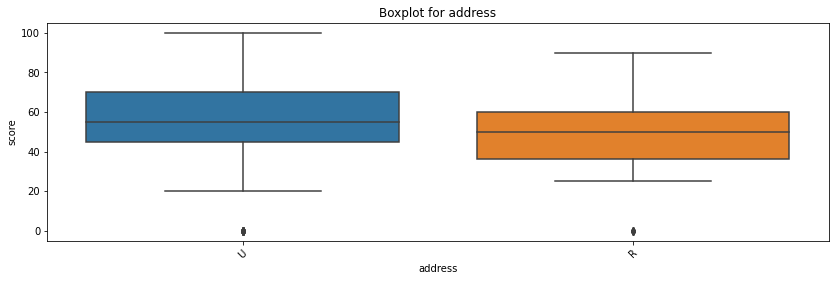

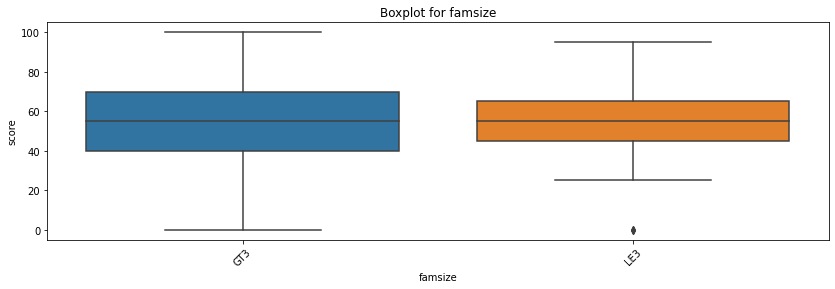

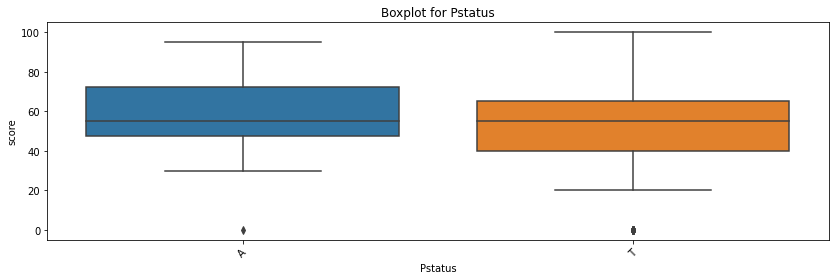

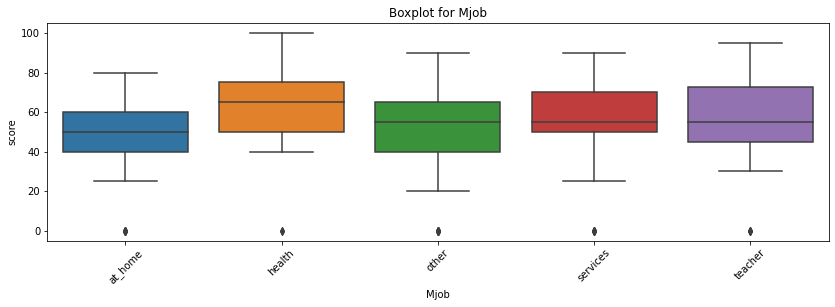

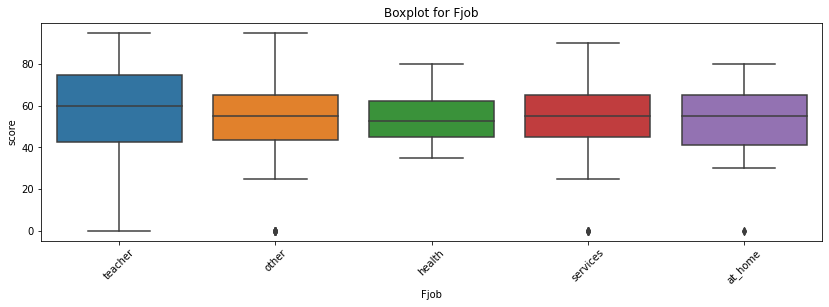

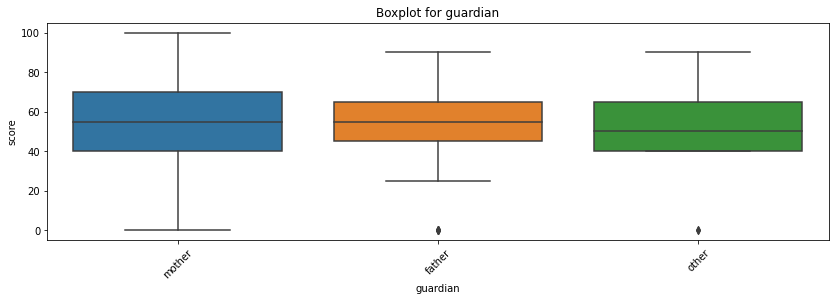

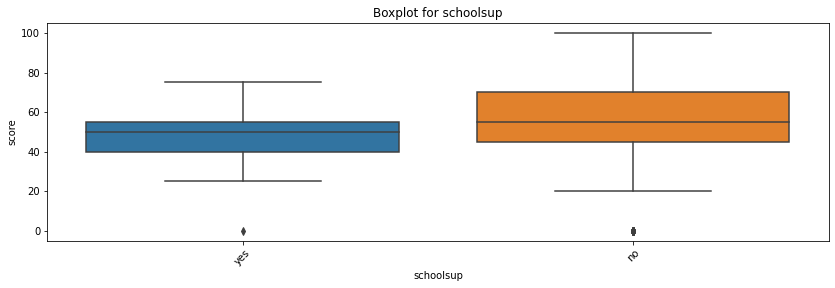

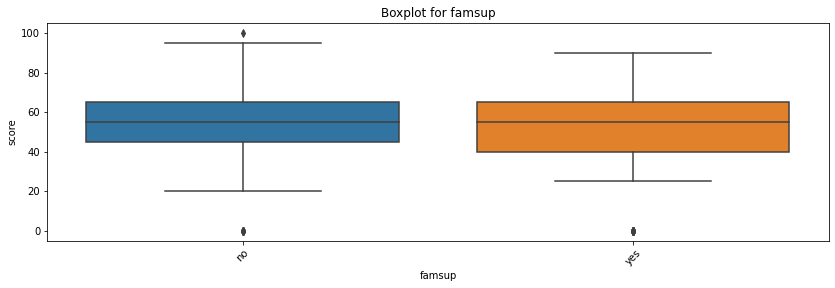

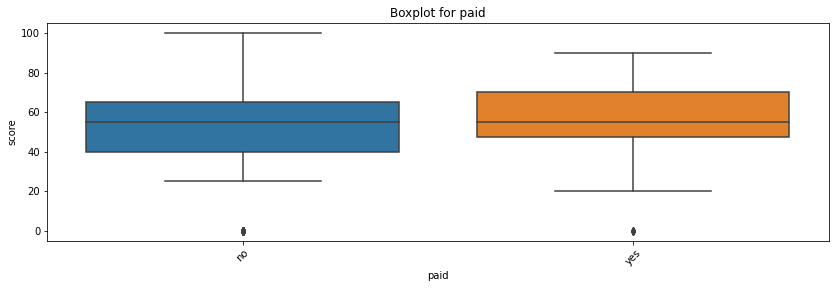

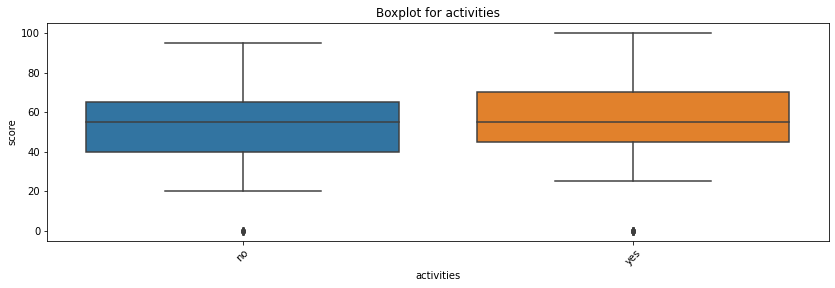

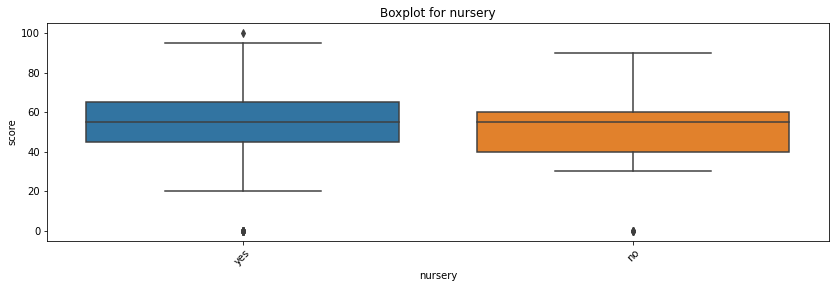

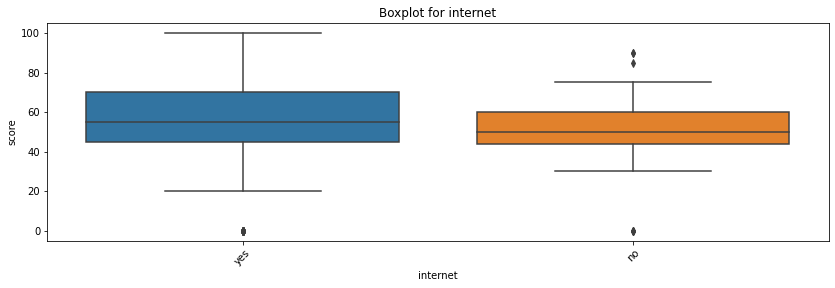

In [68]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=studmath_core_renamed.loc[studmath_core_renamed.loc[:, column].isin(studmath_core_renamed.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet']:
    get_boxplot(col)

по картинкам на оценку влиять могут address, mjob, schoolsup, internet

In [70]:
studmath_core_renamed.drop(['famsize', 'Pstatus',  'Fjob', 'guardian',  'famsup', 'paid', 'activities', 'nursery'], inplace = True, axis = 1)
studmath_core_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     317 non-null    object 
 1   Medu        326 non-null    float64
 2   Fedu        329 non-null    float64
 3   Mjob        312 non-null    object 
 4   traveltime  306 non-null    float64
 5   studytime   324 non-null    float64
 6   schoolsup   320 non-null    object 
 7   internet    299 non-null    object 
 8   famrel      329 non-null    float64
 9   freetime    321 non-null    float64
 10  goout       321 non-null    float64
 11  health      316 non-null    float64
 12  absences    329 non-null    float64
 13  score       324 non-null    float64
dtypes: float64(10), object(4)
memory usage: 38.6+ KB


In [71]:
studmath=studmath_core_renamed
studmath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     317 non-null    object 
 1   Medu        326 non-null    float64
 2   Fedu        329 non-null    float64
 3   Mjob        312 non-null    object 
 4   traveltime  306 non-null    float64
 5   studytime   324 non-null    float64
 6   schoolsup   320 non-null    object 
 7   internet    299 non-null    object 
 8   famrel      329 non-null    float64
 9   freetime    321 non-null    float64
 10  goout       321 non-null    float64
 11  health      316 non-null    float64
 12  absences    329 non-null    float64
 13  score       324 non-null    float64
dtypes: float64(10), object(4)
memory usage: 38.6+ KB


# Выводы

В результате EDA для анализа влияния параметров итоговую оценку были получены следующие выводы:

1. Отброшенны данные не соответсвующие логмческой задаче исследования: school, sex, age, reason, failures, higher, romantic 
2. Исправлены ряды имеющие значения не заложенные методикой иисследования Fedu , famrel
3. Исключены выбросы в перемнной absences
4. В результате корреляционного анализа отброшена переменна я studitime_granulat природа которой неизвестна плюс она имеет очень высокую корреляцию с переменной studytime близкую к фуенкциональной
5. В результате анализа номинативных переменных предлагается оставить для дальнейшего исследования следующие address, mjob, schoolsup, internet
6. В результате первичного анализа данных для модели предлагается использовать соедубщий набор переменных:

    address
    Medu       
    Fedu       
    Mjob        
    traveltime  
    studytime   
    schoolsup   
    internet   
    famrel     
    freetime    
    goout       
    health      
    absences    